In [1]:
from satpy import Scene
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from satpy.writers import get_enhanced_image
from pyresample import get_area_def

In [6]:
def produce_image(filename, save=True, save_name=None, coastlines=False):
    # load file
    global_scene = Scene(reader="seviri_l1b_native", filenames=[filename], reader_kwargs={'fill_disk': True})
    global_scene.load(['HRV'], upper_right_corner = 'NE')
    # define area
    area_id = '1'
    x_size = 1000
    y_size = 1000
    area_extent = [-11.5, 49.5, 2, 60]
    projection = ccrs.PlateCarree().proj4_params
    description = "UK"
    proj_id = 'PlateCarree'
    a = get_area_def(area_id, description, proj_id, projection, x_size, y_size, area_extent)
    crs = a.to_cartopy_crs()

    scene2 = global_scene.resample(a)
    fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=crs))
    img = get_enhanced_image(scene2['HRV']).data.transpose('y', 'x', 'bands')
    ax.imshow(img, transform=crs, extent=crs.bounds, origin='upper', cmap='gray')
    if coastlines:
        ax.coastlines()

    if save:
        if save_name is None:
            save_name = f'{filename[-32:-28]}-{filename[-28:-26]}-{filename[-26:-24]}_{filename[-24:-22]}_{filename[-22:-20]}'
            if coastlines:
                save_name = 'coastlines_' + save_name
        plt.savefig('images/' + save_name + '.png')

C:\Users\sw825517\Documents\miniconda3\envs\sattest\lib\site-packages\satpy\readers\seviri_base.py:385: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  dataset.coords['acq_time'] = ('y', acq_time)
C:\Users\sw825517\Documents\miniconda3\envs\sattest\lib\site-packages\satpy\readers\seviri_base.py:385: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond n

Text(0.5, 1.0, 'henk')

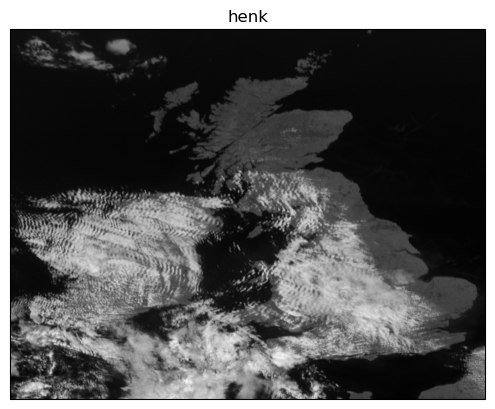

In [7]:
produce_image('data/MSG3-SEVI-MSG15-0100-NA-20230419115741.383000000Z-NA/MSG3-SEVI-MSG15-0100-NA-20230419115741.383000000Z-NA.nat')
plt.title('henk')

In [5]:
plt.show()